In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# combining both data set


In [2]:
#Combining both Train and Test dataset
train=pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
# train.head()
test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183584
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730


In [3]:
train.shape

(1460, 81)

In [4]:
#merged data
data=pd.concat([train,test])
data.shape

(2919, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
data.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [7]:
#to print all column in the data set
data.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

# Cleaning the data

In [8]:
data=data[['LotArea','OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath',
          'BedroomAbvGr','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice']]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       2919 non-null   int64  
 1   OverallQual   2919 non-null   int64  
 2   YearBuilt     2919 non-null   int64  
 3   YearRemodAdd  2919 non-null   int64  
 4   TotalBsmtSF   2918 non-null   float64
 5   1stFlrSF      2919 non-null   int64  
 6   2ndFlrSF      2919 non-null   int64  
 7   GrLivArea     2919 non-null   int64  
 8   FullBath      2919 non-null   int64  
 9   HalfBath      2919 non-null   int64  
 10  BedroomAbvGr  2919 non-null   int64  
 11  GarageCars    2918 non-null   float64
 12  GarageArea    2918 non-null   float64
 13  WoodDeckSF    2919 non-null   int64  
 14  OpenPorchSF   2919 non-null   int64  
 15  SalePrice     2919 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 387.7 KB


In [9]:
#printing the cleaning dataset
data.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,8450,7,2003,2003,856.0,856,854,1710,2,1,3,2.0,548.0,0,61,208500
1,9600,6,1976,1976,1262.0,1262,0,1262,2,0,3,2.0,460.0,298,0,181500
2,11250,7,2001,2002,920.0,920,866,1786,2,1,3,2.0,608.0,0,42,223500
3,9550,7,1915,1970,756.0,961,756,1717,1,0,3,3.0,642.0,0,35,140000
4,14260,8,2000,2000,1145.0,1145,1053,2198,2,1,4,3.0,836.0,192,84,250000


In [10]:
data.tail()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
1454,1936,4,1970,1970,546.0,546,546,1092,1,1,3,0.0,0.0,0,0,167081
1455,1894,4,1970,1970,546.0,546,546,1092,1,1,3,1.0,286.0,0,24,164789
1456,20000,5,1960,1996,1224.0,1224,0,1224,1,0,4,2.0,576.0,474,0,219222
1457,10441,5,1992,1992,912.0,970,0,970,1,0,3,0.0,0.0,80,32,184924
1458,9627,7,1993,1994,996.0,996,1004,2000,2,1,3,3.0,650.0,190,48,187742


In [11]:
data.shape

(2919, 16)

# Visualization


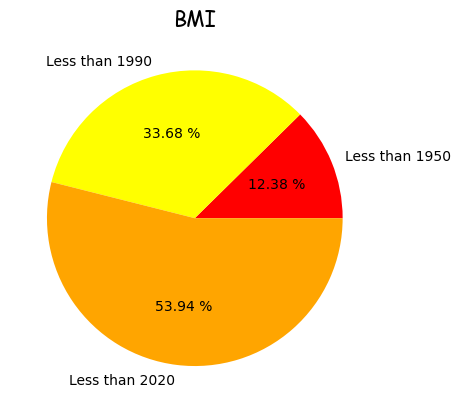

In [12]:
first=data.loc[data['YearBuilt']<=1950].count()[0]
second=data.loc[data['YearBuilt']<=1990].count()[0]
third=data.loc[data["YearBuilt"]<=2020].count()[0]
label=["Less than 1950",'Less than 1990','Less than 2020']
color=['red','yellow','orange']
#for percentage sign we need two percentage symbol
plt.pie([first,second,third],labels=label,colors=color,autopct='%.2f %%')#autopct mean auto percentege where it print only the starting two decimal value 
plt.title('BMI',fontdict={'fontname':'Comic Sans MS','fontsize':15})
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


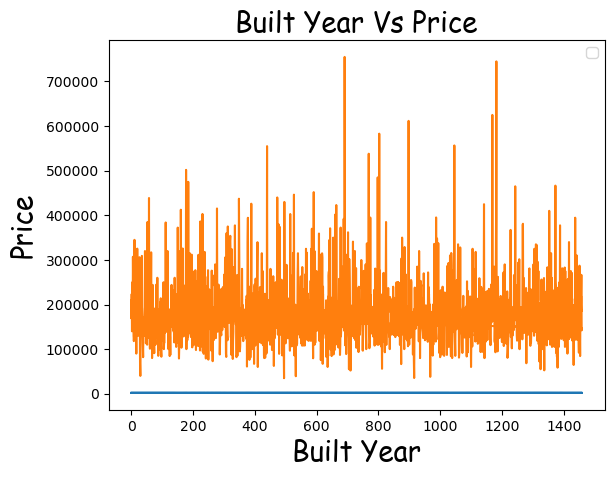

In [13]:
plt.plot(data[["YearBuilt","SalePrice"]])
plt.title("Built Year Vs Price",fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.xlabel('Built Year',fontdict={'fontname':'Comic Sans MS','fontsize':20})
plt.ylabel('Price',fontdict={'fontname':'Comic Sans MS','fontsize':20})

plt.legend()
plt.show()

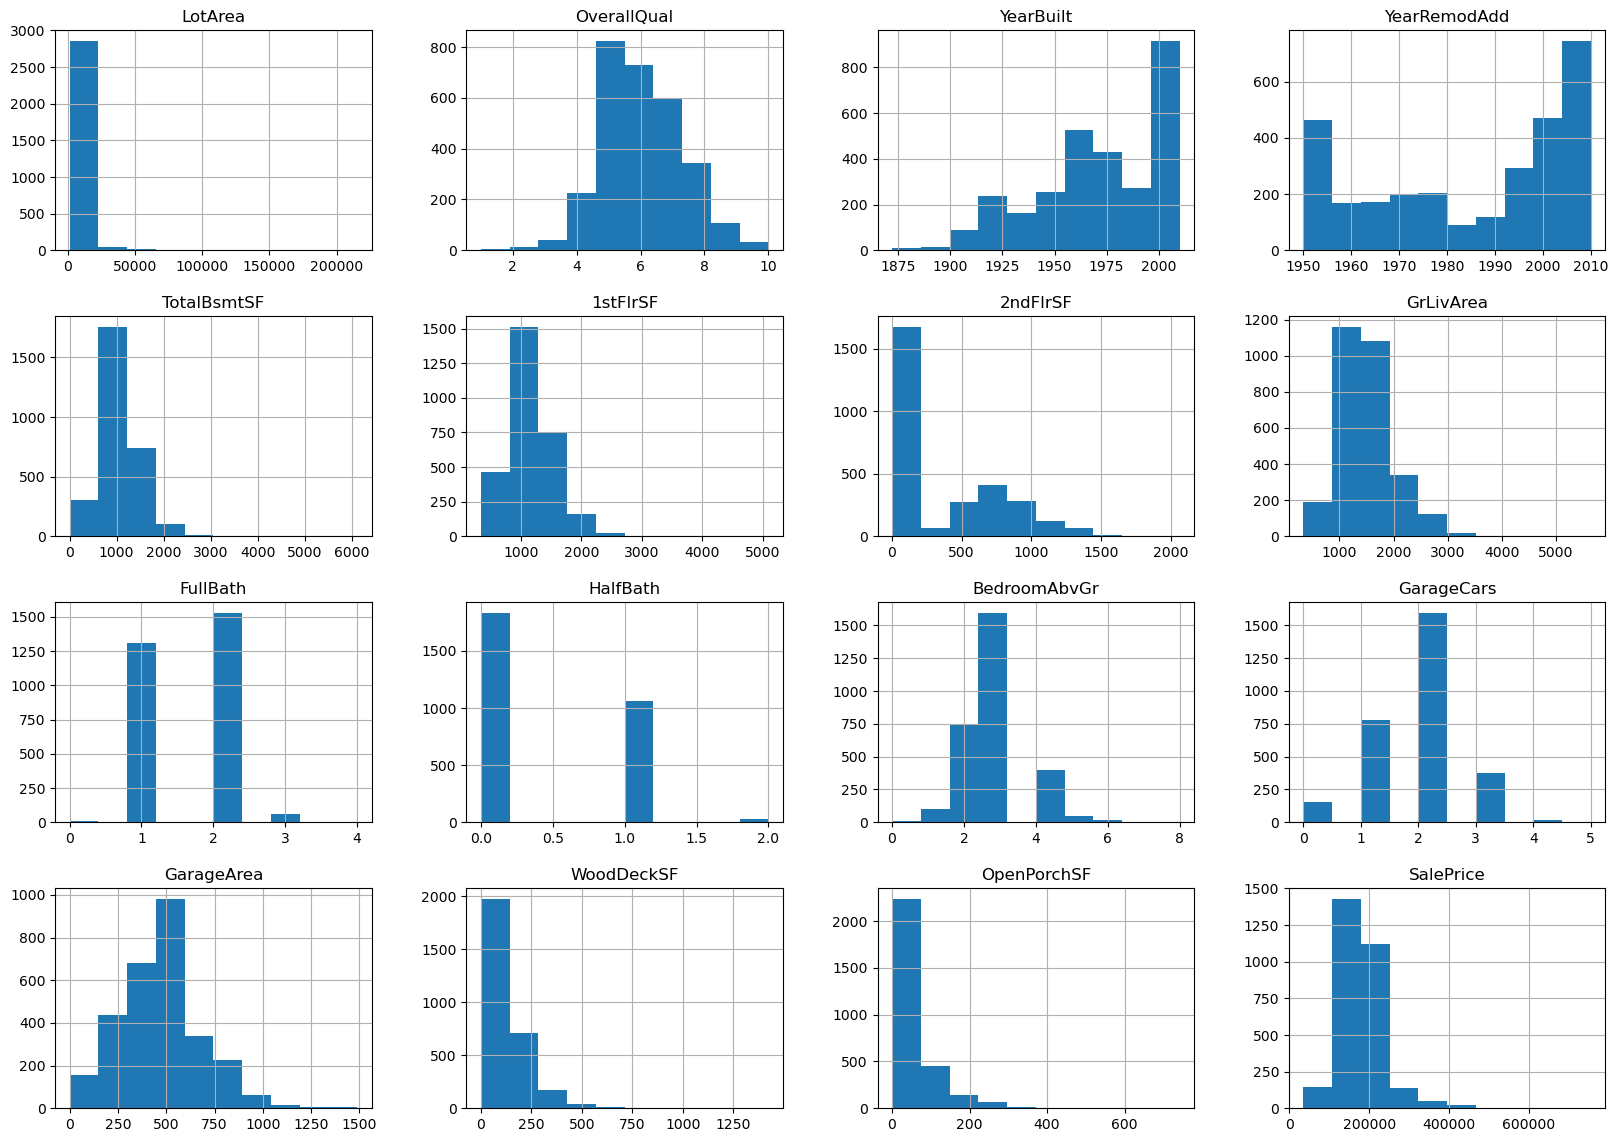

In [14]:
#hist plot for all columns
data.hist(bins=10,figsize=(20,14))
plt.show()

In [15]:
#info of dataset
data.isnull().sum()

LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     1
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
GarageCars      1
GarageArea      1
WoodDeckSF      0
OpenPorchSF     0
SalePrice       0
dtype: int64

In [16]:
data[['TotalBsmtSF','GarageCars','GarageArea']]= data[['TotalBsmtSF','GarageCars','GarageArea']].fillna(0)

In [17]:
data.isnull().sum()

LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
SalePrice       0
dtype: int64

# Splitting of Data

In [18]:
#Seprating the X and Y values
X=data.drop('SalePrice',axis=1) 
Y=data['SalePrice']

In [19]:
X=X.rename({"1stFlrSF":"FirstFlr"},axis=1)
X=X.rename({"2ndFlrSF":"SecondFlr"},axis=1)
X.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,FirstFlr,SecondFlr,GrLivArea,FullBath,HalfBath,BedroomAbvGr,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,8450,7,2003,2003,856.0,856,854,1710,2,1,3,2.0,548.0,0,61
1,9600,6,1976,1976,1262.0,1262,0,1262,2,0,3,2.0,460.0,298,0
2,11250,7,2001,2002,920.0,920,866,1786,2,1,3,2.0,608.0,0,42
3,9550,7,1915,1970,756.0,961,756,1717,1,0,3,3.0,642.0,0,35
4,14260,8,2000,2000,1145.0,1145,1053,2198,2,1,4,3.0,836.0,192,84


In [20]:
#splitting the respective cleaned data
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=40)

In [21]:
#comparing the shape of the splitted data
print(X.shape,Y.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(2919, 15) (2919,) (2335, 15) (584, 15) (2335,) (584,)


# Model training

In [22]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [23]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

# Model Evaluation

### Finding the Accuracy


In [24]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy of training dataset:',training_data_accuracy)

Accuracy of training dataset: 0.9935760171306209


# Building the Predictive System

In [25]:
X.head()


,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,FirstFlr,SecondFlr,GrLivArea,FullBath,HalfBath,BedroomAbvGr,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,8450,7,2003,2003,856.0,856,854,1710,2,1,3,2.0,548.0,0,61
1,9600,6,1976,1976,1262.0,1262,0,1262,2,0,3,2.0,460.0,298,0
2,11250,7,2001,2002,920.0,920,866,1786,2,1,3,2.0,608.0,0,42
3,9550,7,1915,1970,756.0,961,756,1717,1,0,3,3.0,642.0,0,35
4,14260,8,2000,2000,1145.0,1145,1053,2198,2,1,4,3.0,836.0,192,84


In [35]:
def prediction():
    LotArea=int(input("Enter the number lotare"))
    OverallQual=int(input("Enter the number overallquality"))
    YearBuilt=int(input("Enter the number yearbuilt"))
    YearRemodAdd=int(input("Enter the number YearRemodAdd"))
    TotalBsmtSF=float(input("Enter the number TotalBsmtSF"))
    FirstFlr=int(input("Enter the number FirstFlr"))
    SecondFlr=int(input("Enter the number SecondFlr"))
    GrLivArea=int(input("Enter the number GrLivArea"))
    FullBath=int(input("Enter the number FullBath"))
    HalfBath=int(input("Enter the number HalfBath"))
    BedroomAbvGr=int(input("Enter the number BedroomAbvGr"))
    GarageCars=float(input("Enter the number GarageCars"))
    GarageArea=float(input("Enter the number GarageArea"))
    WoodDeckSF=int(input("Enter the number WoodDeckSF"))
    OpenPorchSF=int(input("Enter the number OpenPorchSF"))
    
    data=pd.DataFrame([[LotArea,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,FirstFlr,SecondFlr,GrLivArea,FullBath,HalfBath,BedroomAbvGr,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF]])
    columns=['LotArea','OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','FirstFlr','SecondFlr','GrLivArea','FullBath','HalfBath','BedroomAbvGr','GarageCars','GarageArea','WoodDeckSF','OpenorchSF']
    prediction = model.predict(data)
    print("Prediction:",prediction)

In [36]:
data.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,8450,7,2003,2003,856.0,856,854,1710,2,1,3,2.0,548.0,0,61,208500
1,9600,6,1976,1976,1262.0,1262,0,1262,2,0,3,2.0,460.0,298,0,181500
2,11250,7,2001,2002,920.0,920,866,1786,2,1,3,2.0,608.0,0,42,223500
3,9550,7,1915,1970,756.0,961,756,1717,1,0,3,3.0,642.0,0,35,140000
4,14260,8,2000,2000,1145.0,1145,1053,2198,2,1,4,3.0,836.0,192,84,250000


In [37]:
prediction()

Enter the number lotare8450
Enter the number overallquality7
Enter the number yearbuilt2003
Enter the number YearRemodAdd2003
Enter the number TotalBsmtSF856.0
Enter the number FirstFlr856
Enter the number SecondFlr854
Enter the number GrLivArea1710
Enter the number FullBath2
Enter the number HalfBath1
Enter the number BedroomAbvGr3
Enter the number GarageCars2.0
Enter the number GarageArea548.0
Enter the number WoodDeckSF0
Enter the number OpenPorchSF61
Prediction: [208500]


E:\ml\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
